In [2]:
from PIL import Image
import numpy as np
from sklearn.mixture import GMM, GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, NoNorm
np.random.seed(64)

In [3]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    return [(int(i[:2], 16)/255.0, int(i[2:4], 16)/255.0, int(i[4:], 16)/255.0) for i in colors]

In [4]:
f = 'ilk-3b-1024.tif'
ds = Image.open(f)
img_array = np.array(ds)
img_array.shape

(1024, 1024, 3)

In [5]:
i, j = np.indices(img_array.shape[:2])
img_ind = np.r_["2,3,0", i, j, img_array]

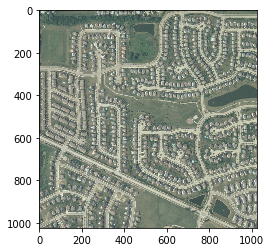

In [6]:
plt.imshow(img_array)

In [7]:
img = img_array.reshape((img_array.shape[0] * img_array.shape[1], 3))

In [8]:
gmm = GaussianMixture(n_components=5)
gmm.fit(img)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
pred = gmm.predict(img)

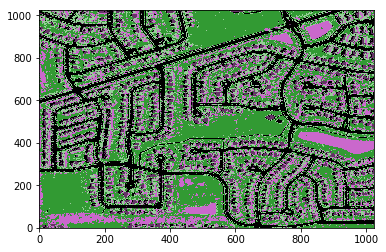

In [16]:
out = np.reshape(np.array(pred), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(5))
plt.pcolor(temp, cmap=cmap, norm=NoNorm())

In [22]:
gmm10 = GaussianMixture(n_components=10)
gmm10.fit(img)
pred = gmm10.predict(img)

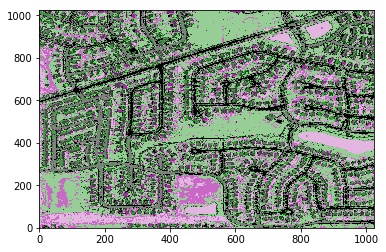

In [26]:
out = np.reshape(np.array(pred), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(10))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

In [25]:
img2 = img_ind.reshape((img_ind.shape[0] * img_ind.shape[1], 5))

In [27]:
gmm.fit(img2)
pred = gmm.predict(img2)

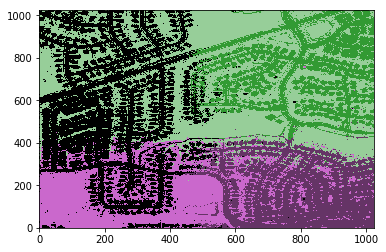

In [28]:
out = np.reshape(np.array(pred), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(5))
plt.pcolor(out, cmap=cmap, norm=NoNorm())

In [29]:
gmm10.fit(img2)
pred = gmm10.predict(img2)

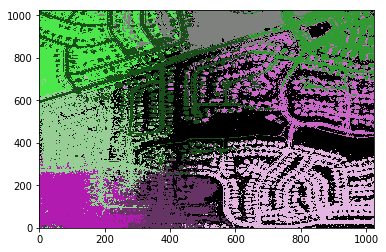

In [30]:
out = np.reshape(np.array(pred), (1024, 1024))
cmap = ListedColormap(get_spaced_colors(10))
plt.pcolor(out, cmap=cmap, norm=NoNorm())